# Kaggle Titanic Data - Raw Data Analysis

## Import required library and load data

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Input data: train.csv, test.csv  
(Data column)  
Sibsp: number of siblings/spouses aboard the Titanic  
Parch: number of parents/children aboard the Titanic  
embarked: Port of embarkation  
    C = Cherbourg  
    Q = Queenstown  
    S = Southampton  
Pclass: ticket class  
    1 = upper  
    2 = middle  
    3 = low  

In [2]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

In [3]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploring raw data 

In [5]:
data_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
data_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [7]:
data_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [8]:
data_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [9]:
pdp.ProfileReport(data_train)

In [10]:
# Function to obtain information of null data (missing data)
def null_info(df):
    num_null_val = df.isnull().sum()
    p_null_val = 100*num_null_val/len(df)
    null_info = pd.concat([num_null_val, p_null_val], axis=1)
    null_info = null_info.rename(columns = {0: 'Counts of null', 1:'%'})
    return null_info

In [11]:
null_info(data_train)

Counts of null          %
PassengerId               0   0.000000
Survived                  0   0.000000
Pclass                    0   0.000000
Name                      0   0.000000
Sex                       0   0.000000
Age                     177  19.865320
SibSp                     0   0.000000
Parch                     0   0.000000
Ticket                    0   0.000000
Fare                      0   0.000000
Cabin                   687  77.104377
Embarked                  2   0.224467

In [12]:
null_info(data_test)

Counts of null          %
PassengerId               0   0.000000
Pclass                    0   0.000000
Name                      0   0.000000
Sex                       0   0.000000
Age                      86  20.574163
SibSp                     0   0.000000
Parch                     0   0.000000
Ticket                    0   0.000000
Fare                      1   0.239234
Cabin                   327  78.229665
Embarked                  0   0.000000

##  Data Cleaning
Since ~80% of cells of cabin is NaN, cabin is discarded in training.

### Repalce sex to 0 (male) or 1 (female)  

In [13]:
# data_train = data_train.replace("male", 0).replace("female", 1)
# data_test = data_test.replace("male", 0).replace("female", 1)

data_train['Sex'] = data_train['Sex'].map({"male":0, "female":1})
data_test['Sex'] = data_test['Sex'].map({"male":0, "female":1})
data_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    0  27.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1   NaN      1   
889                              Behr, Mr. Karl Howell    0  26.0      0   
890                                Dooley, Mr. Patrick    0  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

### Fill null data in Age with median value of age

In [14]:
data_train["Age"] = data_train["Age"].fillna(data_train["Age"].median())
data_test["Age"] = data_test["Age"].fillna(data_test["Age"].median())

### Fill null data in "Embarked"
S is the most freqent embarked port and hence the missing cells are filled with S.

In [15]:
data_train["Embarked"] = data_train["Embarked"].fillna("S")
data_test["Embarked"] = data_test["Embarked"].fillna("S")
# Repalce strings in "Embarked" to 0 (S), 1 (C), 2 (Q)
data_train["Embarked"] = data_train["Embarked"].map({"S":0, "C":1, "Q":2})
data_test["Embarked"] = data_test["Embarked"].map({"S":0, "C":1, "Q":2})

In [16]:
data_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    0  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1   
2                               Heikkinen, Miss. Laina    1  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1   
4                             Allen, Mr. William Henry    0  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    0  27.0      0   
887                       Graham, Miss. Margaret Edith    1  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    1  28.0      1   
889                              Behr, Mr. Karl Howell    0  26.0      0   
890                                Dooley, Mr. Patrick    0  32.0      0   

     Parch            Ticket     Fare Cabin  Embarked  
0        0         A/5 21171   7.2500   NaN         0  
1        0          PC 17599  71.2833   C85         1  
2        0  STON/O2. 3101282   7.9250   NaN         0  
3        0            113803  53.1000  C123         0  
4        0            373450   8.0500   NaN         0  
..     ...               ...      ...   ...       ...  
886      0            211536  13.0000   NaN         0  
887      0            112053  30.0000   B42         0  
888      2        W./C. 6607  23.4500   NaN         0  
889      0            111369  30.0000  C148         1  
890      0            370376   7.7500   NaN         2  

[891 rows x 12 columns]

In [17]:
null_info(data_train)

Counts of null          %
PassengerId               0   0.000000
Survived                  0   0.000000
Pclass                    0   0.000000
Name                      0   0.000000
Sex                       0   0.000000
Age                       0   0.000000
SibSp                     0   0.000000
Parch                     0   0.000000
Ticket                    0   0.000000
Fare                      0   0.000000
Cabin                   687  77.104377
Embarked                  0   0.000000

In [18]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [19]:
data_test["Fare"] = data_test["Fare"].fillna(data_test["Fare"].median())
null_info(data_test)

Counts of null          %
PassengerId               0   0.000000
Pclass                    0   0.000000
Name                      0   0.000000
Sex                       0   0.000000
Age                       0   0.000000
SibSp                     0   0.000000
Parch                     0   0.000000
Ticket                    0   0.000000
Fare                      0   0.000000
Cabin                   327  78.229665
Embarked                  0   0.000000

In [20]:
pdp.ProfileReport(data_train)

In [21]:
# survival rate
data_train['Survived'].mean()

0.3838383838383838

In [22]:
# Pclass
data_train['Survived'].groupby(data_train['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

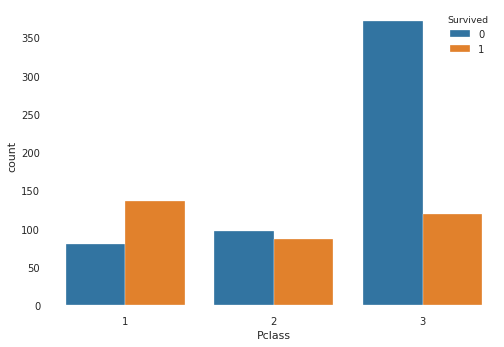

In [23]:
sns.countplot(data_train['Pclass'], hue=data_train['Survived'])

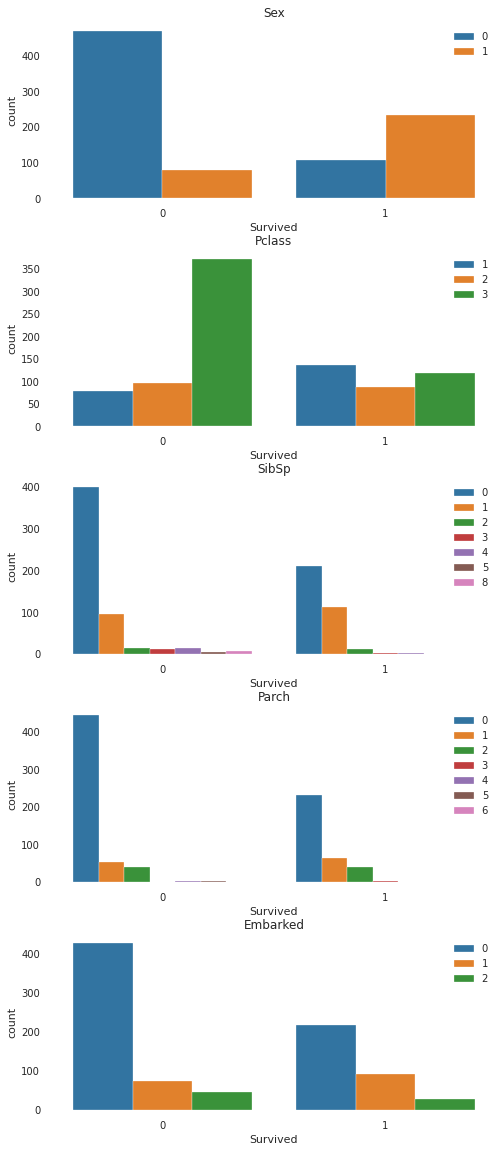

In [34]:
columns = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']

fig, axes = plt.subplots(len(columns), 1, figsize=(8, 20))
plt.subplots_adjust(hspace=0.3)

for column, ax in zip(columns, axes):
    sns.countplot(x='Survived', hue=column, data=data_train, ax=ax)
    ax.legend(loc='upper right')
    ax.set_title(column)

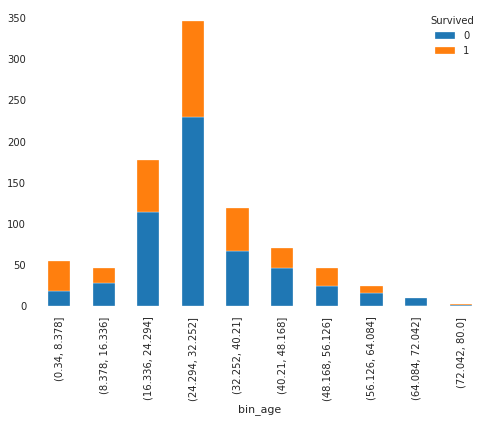

In [28]:
data_train['bin_age'] = pd.cut(data_train['Age'],10)
pd.crosstab(data_train['bin_age'], data_train['Survived']).plot.bar(stacked=True)

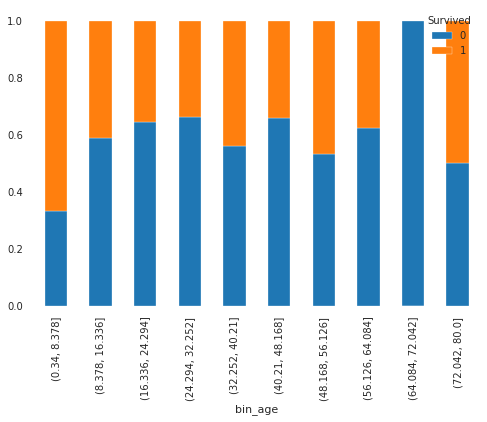

In [29]:
data_train['bin_age'] = pd.cut(data_train['Age'],10)
pd.crosstab(data_train['bin_age'], data_train['Survived'], normalize='index').plot.bar(stacked=True)

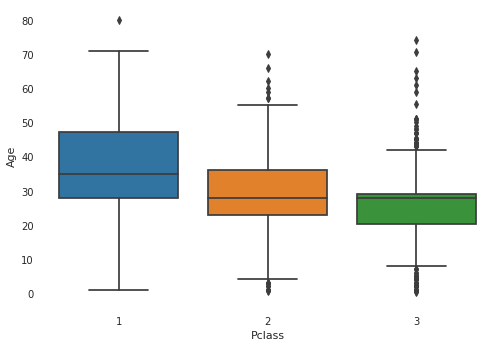

In [36]:
sns.boxplot(x='Pclass', y='Age', data=data_train)

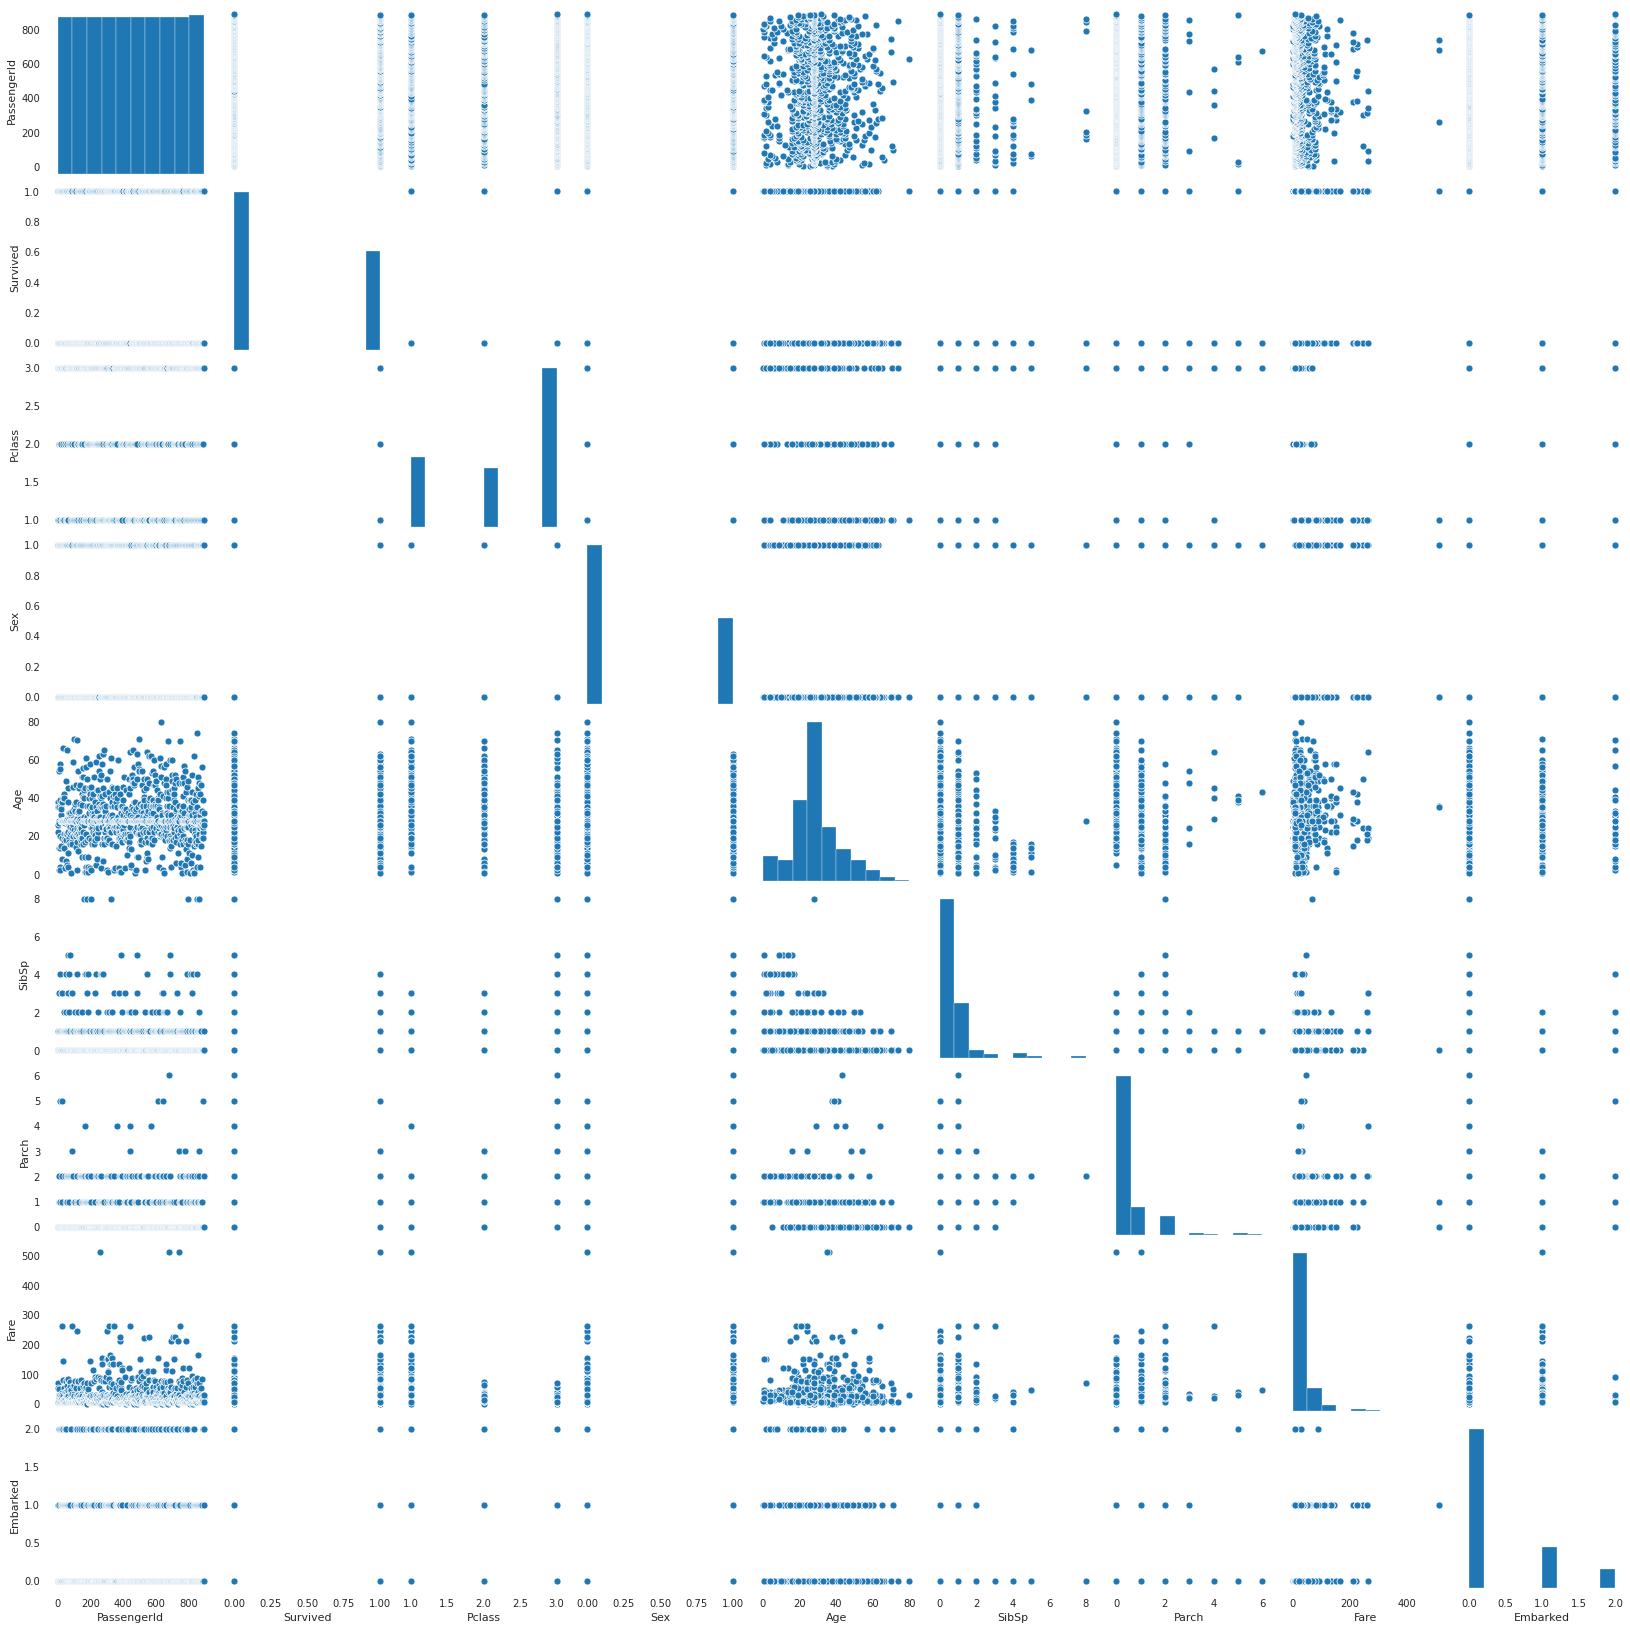

In [37]:
sns.pairplot(data_train)